#Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining
#how many dummy variables you have created and RMSE value for each model. Finally which model you will use for
#Forecasting.


In [78]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [79]:
from google.colab import files
uploaded=files.upload()

Saving Airlines+Data (3).xlsx to Airlines+Data (3) (1).xlsx


In [80]:
data=pd.read_excel('Airlines+Data (3).xlsx')
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [82]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [83]:
data.corr()

,Passengers
Passengers,1.0


In [84]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [85]:
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [86]:
data.rename({'Month':'date'},axis=1,inplace=True)
data

,date,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


<Axes: >

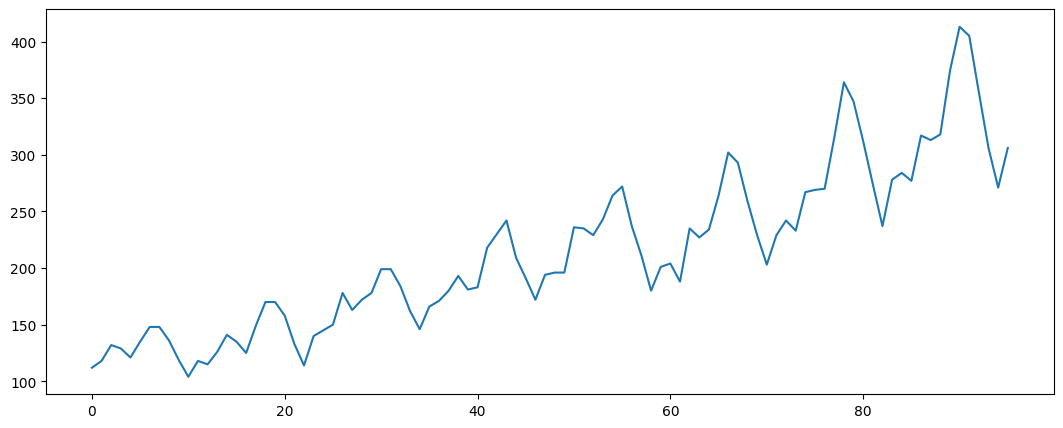

In [87]:
data['Passengers'].plot(figsize=[13,5])

In [88]:
len(data)

96

In [89]:
data1=data.copy()
data1.set_index('date',inplace=True)

In [90]:
data1

,Passengers
date,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [91]:
data['date']=pd.to_datetime(data.date,format='%b-%y')
data['Month']=data.date.dt.strftime('%b')
data['year']=data.date.dt.strftime('%y')

In [92]:
data

,date,Passengers,Month,year
0,1995-01-01,112,Jan,95
1,1995-02-01,118,Feb,95
2,1995-03-01,132,Mar,95
3,1995-04-01,129,Apr,95
4,1995-05-01,121,May,95
...,...,...,...,...
91,2002-08-01,405,Aug,02
92,2002-09-01,355,Sep,02
93,2002-10-01,306,Oct,02
94,2002-11-01,271,Nov,02


<Axes: xlabel='year', ylabel='Passengers'>

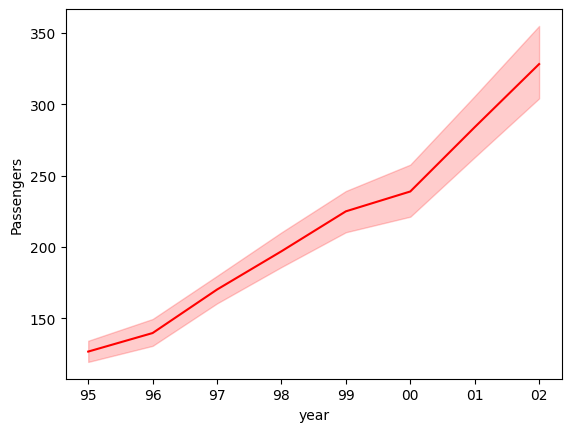

In [93]:
sns.lineplot(data,y='Passengers',x='year',color='red')

In [94]:
heat_map=pd.pivot_table(data,index='year',columns='Month',values='Passengers',aggfunc='mean',fill_value=0)
heat_map

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
year,,,,,,,,,,,,
00,227,293,229,188,204,302,264,235,234,203,229,259
01,269,347,278,233,242,364,315,267,270,237,274,312
02,313,405,306,277,284,413,374,317,318,271,306,355
95,129,148,118,118,112,148,135,132,121,104,119,136
96,135,170,140,126,115,170,149,141,125,114,133,158
97,163,199,166,150,145,199,178,178,172,146,162,184
98,181,242,194,180,171,230,218,193,183,172,191,209
99,235,272,201,196,196,264,243,236,229,180,211,237


<Axes: xlabel='Month', ylabel='year'>

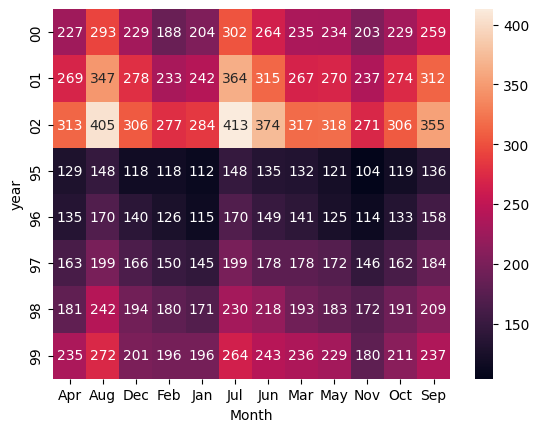

In [95]:
sns.heatmap(heat_map,fmt='g',annot=True)   #annot for numperical labels

<Axes: ylabel='Passengers'>

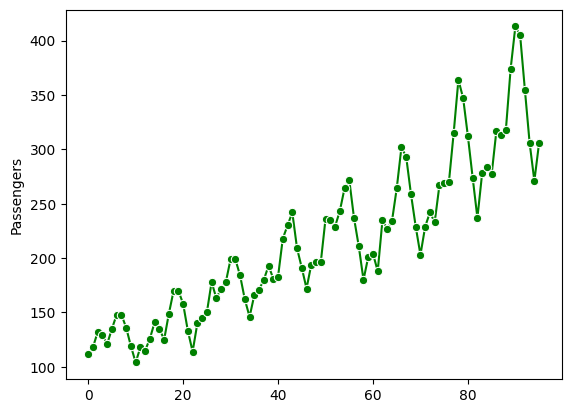

In [96]:
sns.lineplot(data['Passengers'],marker='o',color='green')

<Axes: xlabel='year', ylabel='Density'>

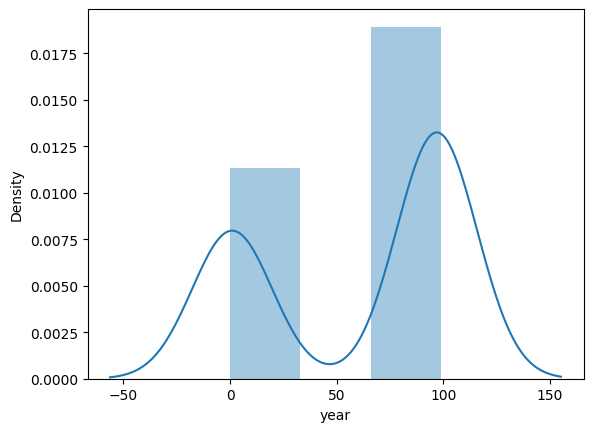

In [97]:
sns.distplot(data['year'])

<Axes: xlabel='year', ylabel='Passengers'>

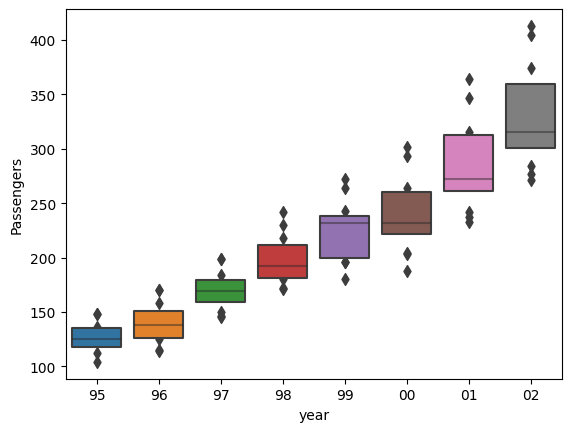

In [98]:
sns.boxenplot(data,y='Passengers',x='year')

In [99]:
dummies=pd.DataFrame(pd.get_dummies(data['Month']))
data1=pd.concat([data,dummies],axis=1)
data1

,date,Passengers,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,02,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,02,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,02,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,02,0,0,0,0,0,0,0,0,0,1,0,0


In [100]:
data1['t']=np.arange(1,97)
data1['t_squared']=(data1['t']**2)
data1['log']= np.log(data1['Passengers'])

In [101]:
data1

,date,Passengers,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log
0,1995-01-01,112,Jan,95,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,Feb,95,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,Mar,95,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,1995-04-01,129,Apr,95,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,May,95,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,02,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,2002-09-01,355,Sep,02,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,2002-10-01,306,Oct,02,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,2002-11-01,271,Nov,02,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


In [102]:
len(data)

96

In [103]:
train=data1.head(75)
test=data1.head(25)

In [104]:
#linear_model
import statsmodels.formula.api as smf
model=smf.ols('Passengers~t',train).fit()
pred_linear=pd.Series(model.predict(pd.DataFrame(test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_linear))**2))
print('rmse_linear :',rmse_linear)

rmse_linear : 17.31088558272981


In [105]:
#exponential model
import statsmodels.formula.api as smf
model=smf.ols('log~t',train).fit()
pred_exp=pd.Series(model.predict(pd.DataFrame(test['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_exp))**2))
print('rmse_exp :',rmse_exp)

rmse_exp : 129.83551147094596


In [106]:
#additive
add_sea= smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print('rmse_add_sea:',rmse_add)


rmse_add_sea: 52.58698398229113


In [107]:
#mulitiply
add_sea= smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train).fit()
pred_add_sea=pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add=np.sqrt(np.mean((np.array(test['Passengers'])-np.array(pred_add_sea))**2))
print('rmse_add_sea:',rmse_add)


rmse_add_sea: 52.58698398229113


In [108]:
data2=pd.DataFrame({'models':['linear','Exponential','Additive Seasonality','Multy Seasonality'],'Values':[rmse_linear,rmse_exp,rmse_add,rmse_add]})

In [109]:
data2

,models,Values
0,linear,17.310886
1,Exponential,129.835511
2,Additive Seasonality,52.586984
3,Multy Seasonality,52.586984


#2)Cococola data

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import datetime
import plotly.express as px
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing,SimpleExpSmoothing,Holt

import warnings
warnings.filterwarnings('ignore')

In [111]:
from google.colab import files
uploaded=files.upload()

Saving CocaCola_Sales_Rawdata (2).xlsx to CocaCola_Sales_Rawdata (2) (1).xlsx


In [112]:
data=pd.read_excel('CocaCola_Sales_Rawdata (2).xlsx')
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [114]:
data.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [115]:
data.corr()

,Sales
Sales,1.0


In [116]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [117]:
len(data)

42

In [118]:
data.columns

Index(['Quarter', 'Sales'], dtype='object')

In [119]:
data.head(3)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993


In [120]:
data['quarter_year']=data['Quarter'].str.split('_').apply (lambda x:' 19'.join(x[:]))
data

,Quarter,Sales,quarter_year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [121]:
data['date']=(pd.to_datetime(data['quarter_year'].str.split(' ').apply(lambda x: ''.join(x[::-1]))))
data.head()

,Quarter,Sales,quarter_year,date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01


In [122]:
data['Quarters']=0
for i in range(42):
  n=data['Quarter'][i]
  data['Quarters'][i]=n[0:2]

In [123]:
data.head()

,Quarter,Sales,quarter_year,date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1


In [124]:
dataa=pd.DataFrame(pd.get_dummies(data['Quarters']))
data1=pd.concat((data,dataa),axis=1)
data1

,Quarter,Sales,quarter_year,date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,0,1,0,0


In [125]:
data1.drop(['Quarter','quarter_year'],axis=1,inplace=True)

In [126]:
data1

,Sales,date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0
5,2104.411995,1987-04-01,Q2,0,1,0,0
6,2014.362999,1987-07-01,Q3,0,0,1,0
7,1991.746998,1987-10-01,Q4,0,0,0,1
8,1869.049999,1988-01-01,Q1,1,0,0,0
9,2313.631996,1988-04-01,Q2,0,1,0,0


In [127]:
data1.set_index('date',inplace=True)
data1.index.year


Int64Index([1986, 1986, 1986, 1986, 1987, 1987, 1987, 1987, 1988, 1988, 1988,
            1988, 1989, 1989, 1989, 1989, 1990, 1990, 1990, 1990, 1991, 1991,
            1991, 1991, 1992, 1992, 1992, 1992, 1993, 1993, 1993, 1993, 1994,
            1994, 1994, 1994, 1995, 1995, 1995, 1995, 1996, 1996],
           dtype='int64', name='date')

In [128]:
data1.head()

,Sales,Quarters,Q1,Q2,Q3,Q4
date,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0
1986-04-01,2244.960999,Q2,0,1,0,0
1986-07-01,2533.804993,Q3,0,0,1,0
1986-10-01,2154.962997,Q4,0,0,0,1
1987-01-01,1547.818996,Q1,1,0,0,0


In [129]:
data['date']=pd.to_datetime(data.date,format='%b-%y')
data['month']=data.date.dt.strftime('%b')
data['year']=data.date.dt.strftime('%y')

In [130]:
data

,Quarter,Sales,quarter_year,date,Quarters,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,86
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,86
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,86
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,86
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,87
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,Apr,87
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,Jul,87
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,Oct,87
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,Jan,88
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,Apr,88


In [131]:
table=pd.pivot_table(data,index='year',columns='month',values='Sales',aggfunc='mean',fill_value=0)

In [132]:
table

month,Apr,Jan,Jul,Oct
year,,,,
86,2244.960999,1734.827000,2533.804993,2154.962997
87,2104.411995,1547.818996,2014.362999,1991.746998
88,2313.631996,1869.049999,2128.320000,2026.828999
89,2331.164993,1910.603996,2206.549995,2173.967995
90,2739.307999,2148.278000,2792.753998,2556.009995
91,3039.522995,2480.973999,3172.115997,2879.000999
92,3550.000000,2772.000000,3508.000000,3243.859993
93,3899.000000,3056.000000,3629.000000,3373.000000
94,4342.000000,3352.000000,4461.000000,4017.000000


<Axes: xlabel='month', ylabel='year'>

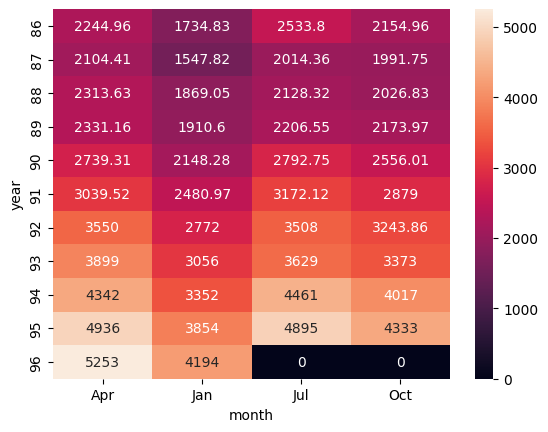

In [133]:
sns.heatmap(table,annot=True,fmt='g')

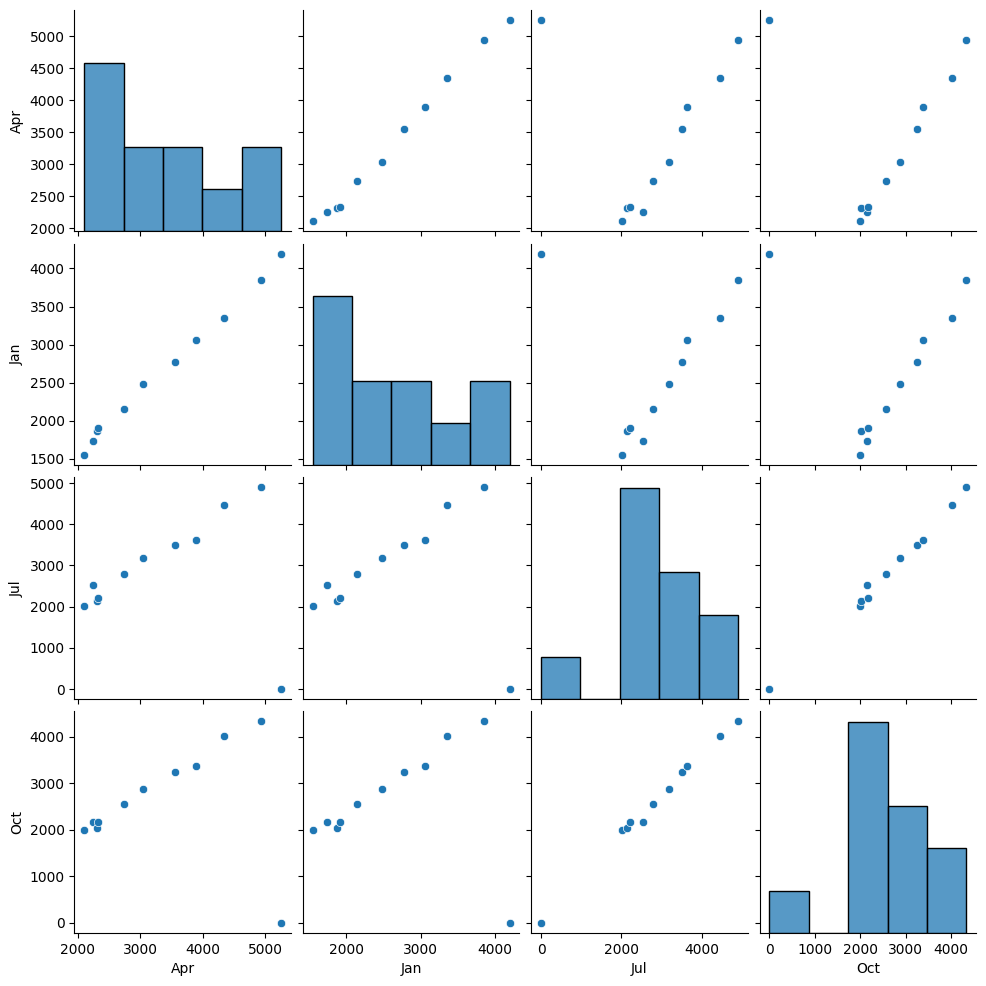

In [134]:
sns.pairplot(table)

<Axes: xlabel='date'>

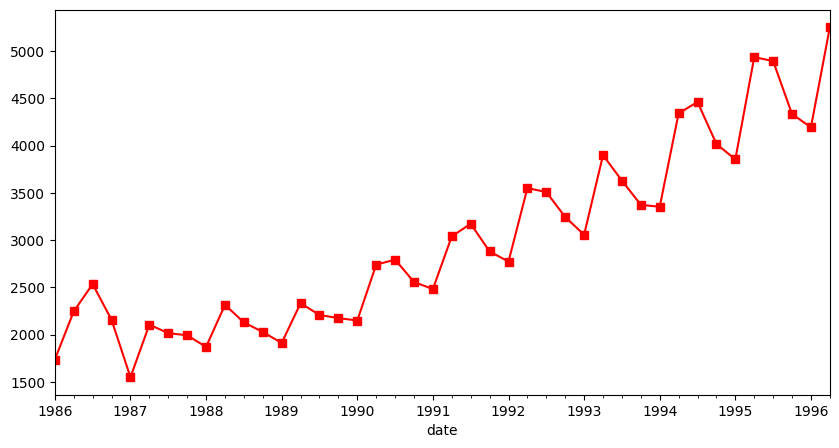

In [135]:
data1['Sales'].plot(figsize=(10,5), color='red',marker='s')

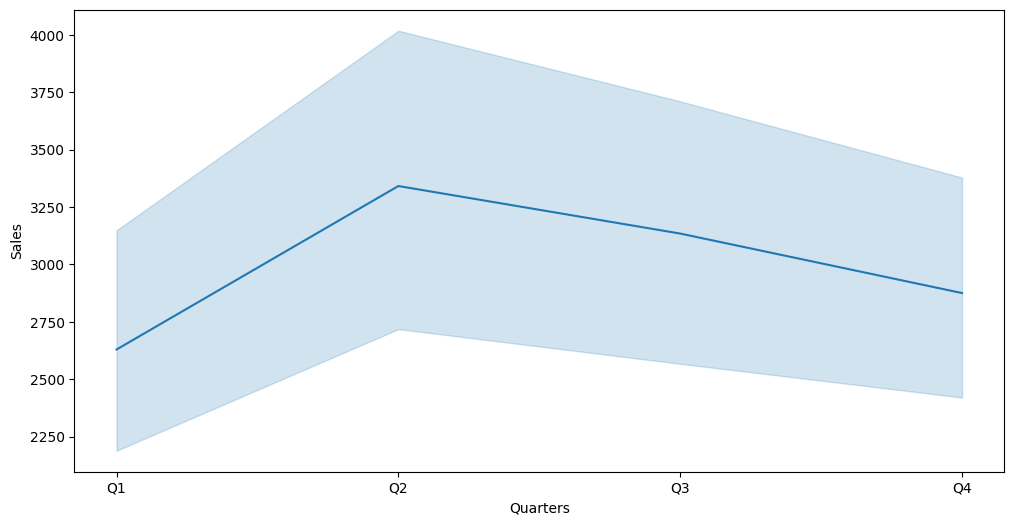

In [136]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Quarters',y='Sales',data=data)
plt.show()

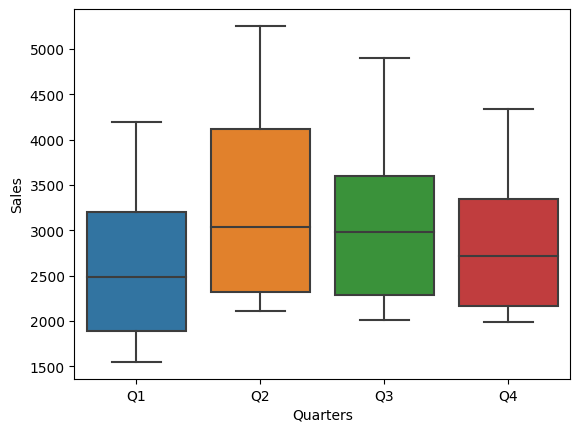

In [137]:
sns.boxplot(x='Quarters',y='Sales',data=data)
plt.show()

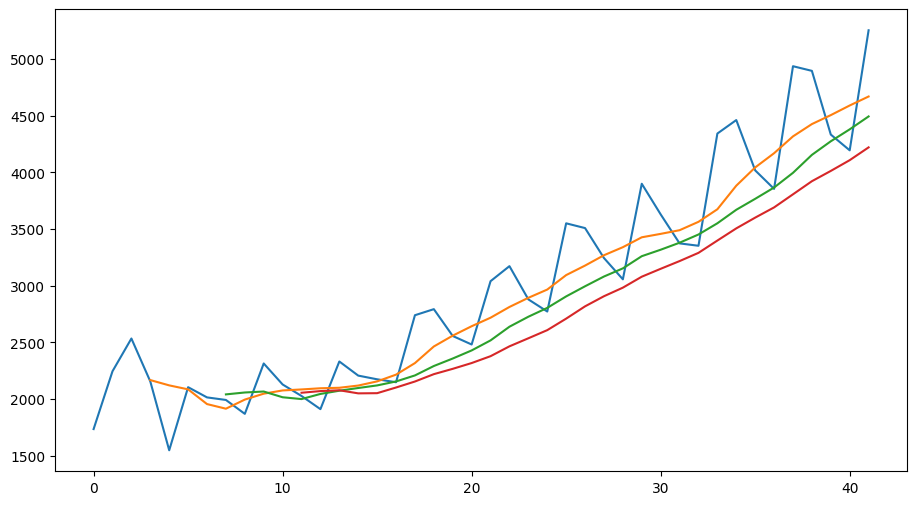

In [138]:
plt.figure(figsize=(11,6))
data.Sales.plot(label='org')
for i in range (4,13,4):
  data['Sales'].rolling(i).mean().plot(label=str(i))

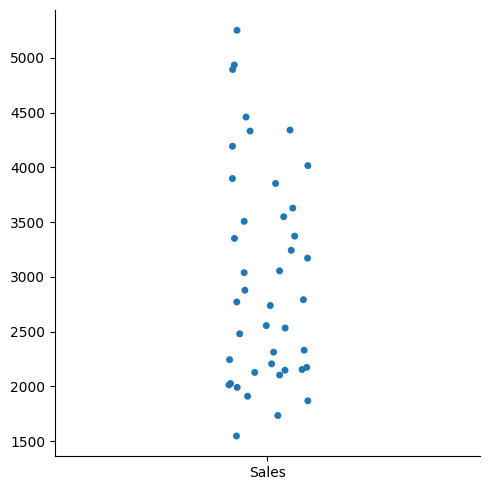

In [139]:
sns.catplot(data)

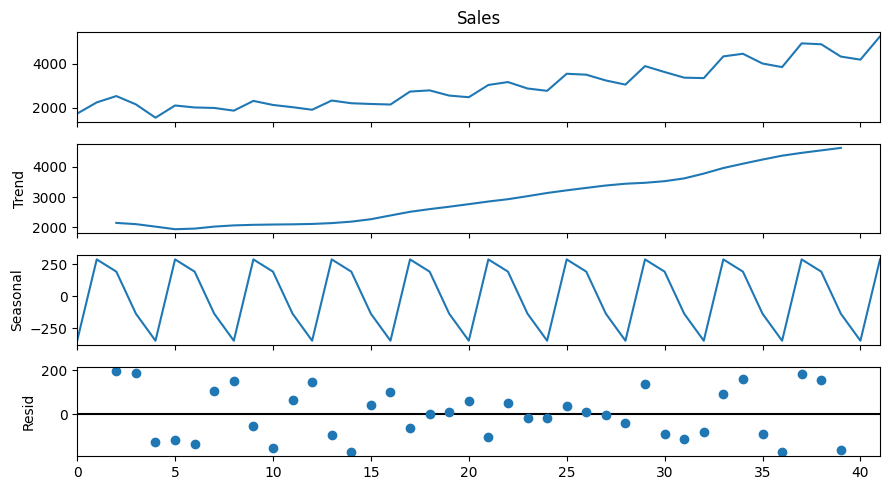

In [140]:
decompose=seasonal_decompose(data.Sales,period=4)
with plt.rc_context():
  plt.rc('figure',figsize=(9,5))
  decompose.plot()
  plt.show()

In [141]:
upsampled_month=data1.drop(['Quarters','Q1','Q2','Q3','Q4'],axis=1)
upsampled_month=upsampled_month.resample('M').mean()
print(upsampled_month.head())

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN


In [142]:
interpolated_month=upsampled_month.interpolate(method='linear')
print(interpolated_month.head())

                  Sales
date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330


<Axes: xlabel='date'>

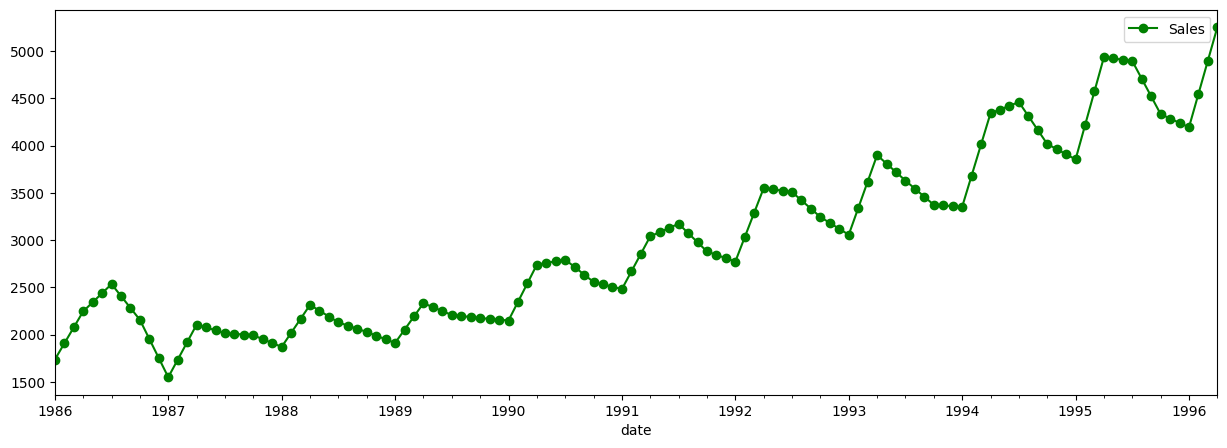

In [143]:
interpolated_month.plot(figsize=[15,5],color='green',marker='o')

In [144]:
interpolated_month

,Sales
date,
1986-01-31,1734.827000
1986-02-28,1904.871666
1986-03-31,2074.916332
1986-04-30,2244.960999
1986-05-31,2341.242330
...,...
1995-12-31,4240.333333
1996-01-31,4194.000000
1996-02-29,4547.000000


In [145]:
train_data=interpolated_month[:100]
test_data=interpolated_month[100:]

In [146]:
interpolated_month.reset_index(inplace=True)
interpolated_month['t'] = np.arange(1,len(interpolated_month)+1)
interpolated_month['t_squared'] = np.square(interpolated_month.t)
interpolated_month["month"] = interpolated_month.date.dt.strftime("%b") # month extraction
interpolated_month["year"] = interpolated_month.date.dt.strftime("%Y") # year extraction
months = pd.get_dummies(interpolated_month['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
cocacola = pd.concat([interpolated_month,months],axis=1)
cocacola['log_sales'] = np.log(cocacola['Sales'])
cocacola

,date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,14400,Dec,1995,0,0,0,0,0,0,0,0,0,0,0,1,8.352397
120,1996-01-31,4194.000000,121,14641,Jan,1996,1,0,0,0,0,0,0,0,0,0,0,0,8.341410
121,1996-02-29,4547.000000,122,14884,Feb,1996,0,1,0,0,0,0,0,0,0,0,0,0,8.422223
122,1996-03-31,4900.000000,123,15129,Mar,1996,0,0,1,0,0,0,0,0,0,0,0,0,8.496990


<Axes: >

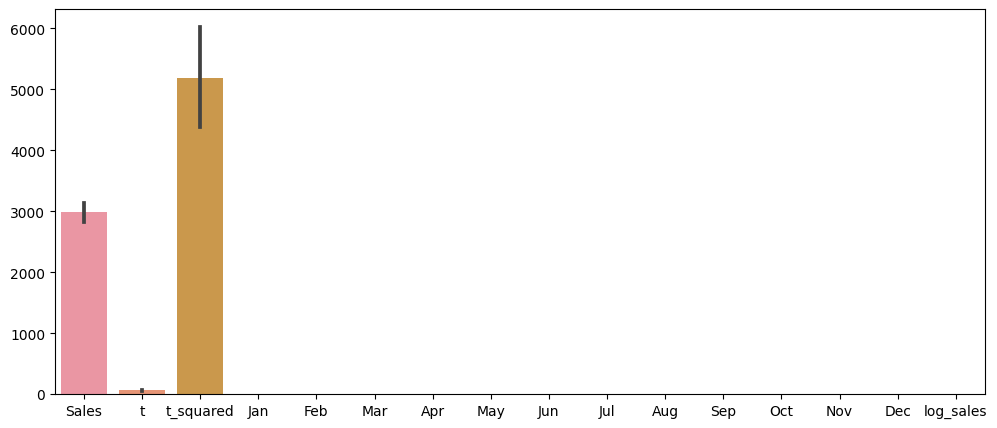

In [147]:
plt.figure(figsize=[12,5])
sns.barplot(cocacola)

In [148]:
size=100
train_data=cocacola.iloc[:size]
test_data=cocacola.iloc[size:]

In [149]:
train_data

,date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
0,1986-01-31,1734.827000,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,7.458663
1,1986-02-28,1904.871666,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,7.552170
2,1986-03-31,2074.916332,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,7.637676
3,1986-04-30,2244.960999,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,7.716443
4,1986-05-31,2341.242330,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,7.758437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1993-12-31,3359.000000,96,9216,Dec,1993,0,0,0,0,0,0,0,0,0,0,0,1,8.119399
96,1994-01-31,3352.000000,97,9409,Jan,1994,1,0,0,0,0,0,0,0,0,0,0,0,8.117312
97,1994-02-28,3682.000000,98,9604,Feb,1994,0,1,0,0,0,0,0,0,0,0,0,0,8.211211
98,1994-03-31,4012.000000,99,9801,Mar,1994,0,0,1,0,0,0,0,0,0,0,0,0,8.297045


In [150]:
test_data

,date,Sales,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_sales
100,1994-05-31,4381.666667,101,10201,May,1994,0,0,0,0,1,0,0,0,0,0,0,0,8.385184
101,1994-06-30,4421.333333,102,10404,Jun,1994,0,0,0,0,0,1,0,0,0,0,0,0,8.394197
102,1994-07-31,4461.000000,103,10609,Jul,1994,0,0,0,0,0,0,1,0,0,0,0,0,8.403128
103,1994-08-31,4313.000000,104,10816,Aug,1994,0,0,0,0,0,0,0,1,0,0,0,0,8.369389
104,1994-09-30,4165.000000,105,11025,Sep,1994,0,0,0,0,0,0,0,0,1,0,0,0,8.334472
105,1994-10-31,4017.000000,106,11236,Oct,1994,0,0,0,0,0,0,0,0,0,1,0,0,8.298291
106,1994-11-30,3962.666667,107,11449,Nov,1994,0,0,0,0,0,0,0,0,0,0,1,0,8.284672
107,1994-12-31,3908.333333,108,11664,Dec,1994,0,0,0,0,0,0,0,0,0,0,0,1,8.270866
108,1995-01-31,3854.000000,109,11881,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,8.256867
109,1995-02-28,4214.666667,110,12100,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,8.346326


In [151]:
from scipy import stats
import statsmodels.formula.api as smf

#linear model
linear_model=smf.ols('Sales~t',data=train_data).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_linear

686.8740863668942

In [152]:
#exponential model
exp_model=smf.ols('log_sales~t',data=train_data).fit()
pred_exp=pd.Series(exp_model.predict(pd.DataFrame(test_data['t'])))
rmse_exp=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_linear))**2))
rmse_exp

686.8740863668942

In [153]:
#additive
add_sea=smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_add_sea=pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723483793

In [154]:
#muliti
mul_sea=smf.ols('log_sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=train_data).fit()
pred_mul_sea=pd.Series(mul_sea.predict(test_data))
rmse_mul_sea=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(pred_mul_sea))**2))
rmse_mul_sea


4462.008204384481

#END